<a href="https://colab.research.google.com/github/iampro3/wordCloud/blob/main/0329_wordcloud1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자연어 처리 
- Wordcloud

In [14]:
# 데이터 불러오기
import pandas as pd
DATA_PATH = 'nlp-getting-started/'
train = pd.read_csv(DATA_PATH + 'train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 내가 현재 작업하는 가상 폴더/ 로컬 폴더 경로 확인하기

In [11]:
import os
DATA_PATH = "./"
for file in os.listdir(DATA_PATH):
print(file)

IndentationError: ignored

In [15]:
import os
os.getcwd()

'/content'

In [17]:
test = pd.read_csv(DATA_PATH + 'test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [18]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [21]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

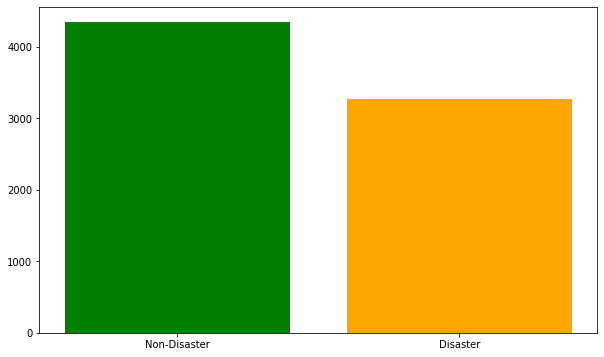

In [22]:
import matplotlib.pyplot as plt
targets = train['target'].value_counts()
labels = ['Non-Disaster', 'Disaster']

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(labels, targets, color = ['green', 'orange'])
plt.show()

In [24]:
disaster_tween_len = train[train['target'] ==1]['text']


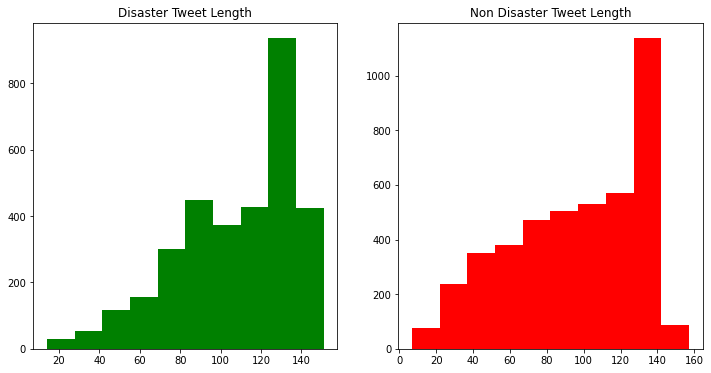

In [25]:
disaster_tween_len = train[train['target'] ==1]['text'].str.len()
non_disaster_tween_len = train[train['target'] ==0]['text'].str.len()

fig,ax =plt.subplots(1,2, figsize = (12,6))
ax[0].hist(disaster_tween_len, color = 'green')
ax[0].set_title('Disaster Tweet Length')
                     
ax[1].hist(non_disaster_tween_len, color = 'red')
ax[1].set_title('Non Disaster Tweet Length')
                     
plt.show()

## 워드 클라우드 작성

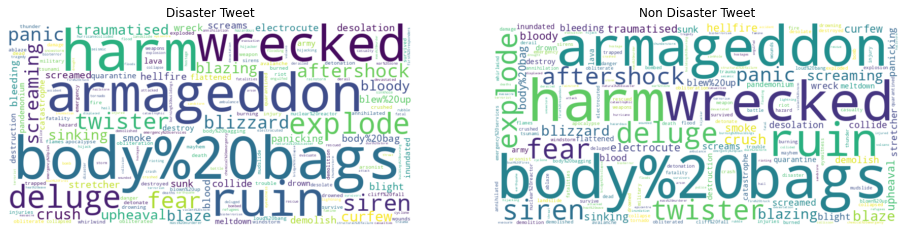

In [33]:
from wordcloud import WordCloud, STOPWORDS

disaster_tweet_keywords = dict(train[train['target']==1]['keyword'].value_counts())
non_disaster_tweet_keywords = dict(train[train['target']==0]['keyword'].value_counts())

stopwords = set(STOPWORDS)
disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(disaster_tweet_keywords)
non_disaster_wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").\
generate_from_frequencies(non_disaster_tweet_keywords)
cloud=disaster_wordcloud.generate_from_frequencies(non_disaster_tweet_keywords)

# jpg 파일로 저장하기
cloud.to_file('test.jpg')

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("Disaster Tweet")
ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title("Non Disaster Tweet")
fig.show()



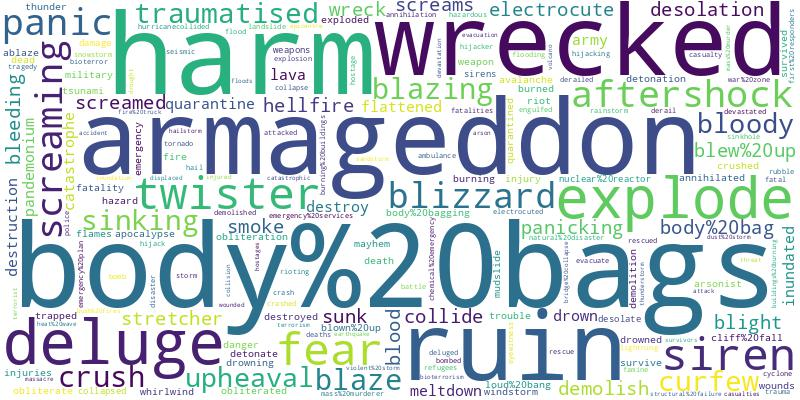

In [27]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 다른 예제